1burst: high/low [ 3.03638594  3.40096379  5.03614614  5.84377881  9.43576688 13.96595302
 11.72559899 25.28153493 21.8434811  29.54067793 28.0044958  31.48781401
 24.50576713]
4burst: high/low [ 2.92973858  3.32865657  4.65828998  5.47042941  9.049737   13.46882877
 10.86871961 25.67263198 21.88667445 27.39081959 27.38112418 28.22616439
 25.04815392]


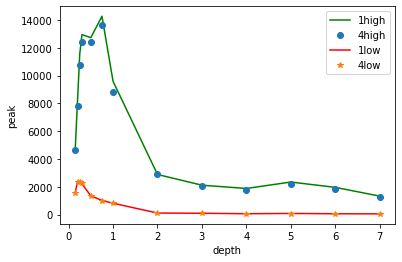

1burst: high/low [ 3.20385109  2.65894784  3.69016487  3.10654814  8.5637818  15.96368289
 19.44375213 21.81351363 25.49739742 28.40588651 32.36797048 35.20371177
 24.17336137]
4burst: high/low [ 2.90564098  2.60072109  3.24380472  3.20451355  7.45317759 15.42989287
 17.4488934  21.13560582 24.82125582 27.0147428  29.75617737 29.51452549
 22.0207841 ]


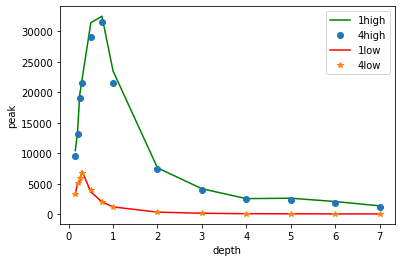

In [2]:
import numpy as np
from utils import *


def read_peak_csv_draw(csv_path, display=False):
    depth_peak = open_area_to_list(csv_path)
    
    depth_high_tmp = depth_peak[::2][:,0]
    depth_high_list = np.array(list(float(i[0:-1]) for i in depth_high_tmp))
    peak_high_list = np.array(list(map(float, depth_peak[::2][:,2])))
    depth_high_list_single = depth_high_list[::2]
    peak_high_list_1burst = peak_high_list[::2]
    peak_high_list_4burst = peak_high_list[1::2]
    
    depth_low_tmp = depth_peak[1::2][:,0]
    depth_low_list = np.array(list(float(i[0:-1]) for i in depth_low_tmp))
    peak_low_list = np.array(list(map(float, depth_peak[1::2][:,2])))
    depth_low_list_single = depth_low_list[::2]
    peak_low_list_1burst = peak_low_list[::2]
    peak_low_list_4burst = peak_low_list[1::2]
    
    if display == True:
        fig = pylab.figure()
        plot1 = pylab.plot(depth_high_list_single, peak_high_list_1burst, "g")
        plot2 = pylab.plot(depth_high_list_single, peak_high_list_4burst, "o")
        plot3 = pylab.plot(depth_high_list_single, peak_low_list_1burst,"r")
        plot4 = pylab.plot(depth_high_list_single, peak_low_list_4burst,"*")
        pylab.legend(labels=["1high","4high", "1low", "4low"])
        print("1burst: high/low",peak_high_list_1burst/peak_low_list_1burst)
        print("4burst: high/low", peak_high_list_4burst/peak_low_list_4burst)
        pylab.xlabel("depth")
        pylab.ylabel("peak")
        pylab.show()
    
    return np.array([depth_high_list_single[4:], 
                     peak_high_list_1burst[4:], peak_high_list_4burst[4:], 
                     peak_low_list_1burst[4:], peak_low_list_4burst[4:]])
    
if __name__ == "__main__":
    csv_20_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_20%_0515_all.csv"
    csv_90_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_90%_0515_all.csv"
    peak_20_dif_module = read_peak_csv_draw(csv_path=csv_20_path, display=True)
    peak_90_dif_module = read_peak_csv_draw(csv_path=csv_90_path, display=True)
    